In [69]:
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas.api.types import is_numeric_dtype

Načítanie datasetu do dataframu

In [70]:
fifa_20_players = pd.read_csv("players_20.csv")

# Základné údaje o datasete

In [71]:
fifa_20_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


Základný dataset má:
- 18278 záznamov
- 104 atribútov

In [72]:
for col in fifa_20_players.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [73]:
fifa_20_players[fifa_20_players['sofifa_id'].duplicated()]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


# Odstránenie nepotrebných stĺpcov

In [74]:
fifa_20_players = fifa_20_players.drop(columns=['player_url', 'dob','body_type','nation_position','nation_jersey_number'])

In [76]:
fifa_20_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   short_name                  18278 non-null  object 
 2   long_name                   18278 non-null  object 
 3   age                         18278 non-null  int64  
 4   height_cm                   18278 non-null  int64  
 5   weight_kg                   18278 non-null  int64  
 6   nationality                 18278 non-null  object 
 7   club                        18278 non-null  object 
 8   overall                     18278 non-null  int64  
 9   potential                   18278 non-null  int64  
 10  value_eur                   18278 non-null  int64  
 11  wage_eur                    18278 non-null  int64  
 12  player_positions            18278 non-null  object 
 13  preferred_foot              182

# Odstránenie a nahradenie NaN hodnôt pre jednotlivé atribúty
Zistile sme, že niektorí hráči majú prázdne niektoré atribúty. Môže to byť spôsobené postom, na ktorom hrajú, alebo nehrajú v národnom tíme a pod.

In [77]:
for (columnName, columnData) in fifa_20_players.iteritems():
   print(columnName + " " + str(columnData.isnull().sum().sum()))

sofifa_id 0
short_name 0
long_name 0
age 0
height_cm 0
weight_kg 0
nationality 0
club 0
overall 0
potential 0
value_eur 0
wage_eur 0
player_positions 0
preferred_foot 0
international_reputation 0
weak_foot 0
skill_moves 0
work_rate 0
real_face 0
release_clause_eur 1298
player_tags 16779
team_position 240
team_jersey_number 240
loaned_from 17230
joined 1288
contract_valid_until 240
pace 2036
shooting 2036
passing 2036
dribbling 2036
defending 2036
physic 2036
gk_diving 16242
gk_handling 16242
gk_kicking 16242
gk_reflexes 16242
gk_speed 16242
gk_positioning 16242
player_traits 10712
attacking_crossing 0
attacking_finishing 0
attacking_heading_accuracy 0
attacking_short_passing 0
attacking_volleys 0
skill_dribbling 0
skill_curve 0
skill_fk_accuracy 0
skill_long_passing 0
skill_ball_control 0
movement_acceleration 0
movement_sprint_speed 0
movement_agility 0
movement_reactions 0
movement_balance 0
power_shot_power 0
power_jumping 0
power_stamina 0
power_strength 0
power_long_shots 0
mental

In [78]:
fifa_20_players[fifa_20_players['team_position'].isna()]

,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
327,245309,E. Schetino,Egidio Maestre Schetino,27,185,80,Uruguay,Uruguay,82,82,...,73+2,76+2,76+2,76+2,73+2,76+2,80+2,80+2,80+2,76+2
328,245313,J. Sildero,José María Sildero,27,177,75,Uruguay,Uruguay,82,82,...,63+2,62+2,62+2,62+2,63+2,59+2,52+2,52+2,52+2,59+2
407,245299,J. Frendado,Jaime Nicolás Frendado,35,181,82,Uruguay,Uruguay,81,81,...,69+2,72+2,72+2,72+2,69+2,72+2,80+2,80+2,80+2,72+2
408,245304,S. Ardero,Saúl Marcelo Ardero,31,171,63,Uruguay,Uruguay,81,81,...,57+2,53+2,53+2,53+2,57+2,51+2,39+2,39+2,39+2,51+2
409,245305,L. Dálves,Luis Roberto Dálves,27,188,83,Uruguay,Uruguay,81,81,...,53+2,51+2,51+2,51+2,53+2,51+2,51+2,51+2,51+2,51+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16353,251735,A. Varkay,Amanpreet Varkay,33,179,71,India,India,58,58,...,57+2,56+2,56+2,56+2,57+2,57+2,57+2,57+2,57+2,57+2
16354,251745,C. Palan,Chapal Palan,28,181,69,India,India,58,58,...,60+2,59+2,59+2,59+2,60+2,61+2,61+2,61+2,61+2,61+2
16356,252735,H. Ivanov,Hristo Ivanov,37,176,65,Bulgaria,Bulgaria,58,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16600,252359,E. Ira Tape,Eliezer Ira Tape,21,192,85,Ivory Coast,Côte d'Ivoire,57,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Všetky atribúty začínajúce s "gk", ktoré majú len brankári, sme nahradili hodnotou 0.0. Hráčom, ktorí nemajú výstupnú klauzulu, bola priradená taktiež hodnota 0.0. Veľa hráčov taktiež nemá žiaden tag. Títo hráči dostali tag #None. Atribúty player_traits a loaned_from dostali na prázdnych miestach 'None'. V atribúte joined sa očakáva dátum, takže každé prázdne miesto dostalo jeden konkrétny dátum. Hrači s prázdnym atribútom team_position boli odstránení.

In [80]:
fifa_20_players['gk_diving'] = fifa_20_players['gk_diving'].replace(np.nan, 0.0)
fifa_20_players['gk_handling'] = fifa_20_players['gk_handling'].replace(np.nan, 0.0)
fifa_20_players['gk_kicking'] = fifa_20_players['gk_kicking'].replace(np.nan, 0.0)
fifa_20_players['gk_reflexes'] = fifa_20_players['gk_reflexes'].replace(np.nan, 0.0)
fifa_20_players['gk_speed'] = fifa_20_players['gk_speed'].replace(np.nan, 0.0)
fifa_20_players['gk_positioning'] = fifa_20_players['gk_positioning'].replace(np.nan, 0.0)
fifa_20_players['release_clause_eur'] = fifa_20_players['release_clause_eur'].replace(np.nan, 0.0)
fifa_20_players['player_tags'] = fifa_20_players['player_tags'].replace(np.nan, "#None")
fifa_20_players['player_traits'] = fifa_20_players['player_traits'].replace(np.nan, 'None')
fifa_20_players['loaned_from'] = fifa_20_players['loaned_from'].replace(np.nan, 'None')
fifa_20_players['joined'] = fifa_20_players['joined'].replace(np.nan, '2019-08-31')
fifa_20_players = fifa_20_players[fifa_20_players['pace'].notna()]
fifa_20_players = fifa_20_players[fifa_20_players['team_position'].notna()]
for (columnName, columnData) in fifa_20_players.iteritems():
   print(columnName + " " + str(columnData.isnull().sum().sum()))

sofifa_id 0
short_name 0
long_name 0
age 0
height_cm 0
weight_kg 0
nationality 0
club 0
overall 0
potential 0
value_eur 0
wage_eur 0
player_positions 0
preferred_foot 0
international_reputation 0
weak_foot 0
skill_moves 0
work_rate 0
real_face 0
release_clause_eur 0
player_tags 0
team_position 0
team_jersey_number 0
loaned_from 0
joined 0
contract_valid_until 0
pace 0
shooting 0
passing 0
dribbling 0
defending 0
physic 0
gk_diving 0
gk_handling 0
gk_kicking 0
gk_reflexes 0
gk_speed 0
gk_positioning 0
player_traits 0
attacking_crossing 0
attacking_finishing 0
attacking_heading_accuracy 0
attacking_short_passing 0
attacking_volleys 0
skill_dribbling 0
skill_curve 0
skill_fk_accuracy 0
skill_long_passing 0
skill_ball_control 0
movement_acceleration 0
movement_sprint_speed 0
movement_agility 0
movement_reactions 0
movement_balance 0
power_shot_power 0
power_jumping 0
power_stamina 0
power_strength 0
power_long_shots 0
mentality_aggression 0
mentality_interceptions 0
mentality_positioning 0

# Opis atribútov

sofifa_id - unikátne FIFA ID

short_name - meno hráča (krátka verzia)

long_name - meno hráča (dlhšia verzia)

age - numerický atribút vek hráča

height_cm - numerický atribút výška hráča v cm

weight_kg - numerický atribút váha hráča v kg

nationality - krajina pôvodu

club - aktuálne hrajúci za klub s názvom

overall - numerický atribút momentálny celkový rating hráča

potential - numberický atribút najvyššie možný dosiahnuteľná rating hráča

value_eur - numerický atribút hodnota hráča v hre

wage_eur - numerický atribút plat hráča v hre

player_positions - pozície na ktorých hráč hráva

preferred_foot - preferovaná noha ľavá/pravá

international_reputation - kategorický atribút od 1-5, kde 5 je najviac, a môže ovplyvniť celkový rating

weak_foot - kategorický atribút 1-5, čím vyššie číslo tým viac môže ovplyvniť streľbu a ovládanie lopty. 

skill_moves - kategorický atribút 1-5

work_rate - kategorický atribút kombinácia high,medium,low

real_face - áno/nie buď má svoju tvár v hre alebo nie

release_clause_eur - numerický atribút výstupná klauzula v eurách, nemajú všetci 

player_tags - tagy, ktorými možno označiť hráča

team_position - pozícia v tíme 

team_jersey_number - čislo, ktoré hráč nosí na drese

loaned_from - hosťovaný z klubu

joined - dátum príchodu do klubu

contract_valid_until - dátum expirácie kontraktu

numerické atribúty, kde najvyššia hodnota môže byť 99 a najmenšia 0:
pace,
shooting,
passing,
dribbling,
defending,
physic,
gk_diving,
gk_handling,
gk_kicking,
gk_reflexes,
gk_speed,
gk_positioning,
player_traits,
attacking_crossing,
attacking_finishing,
attacking_heading_accuracy,
attacking_short_passing,
attacking_volleys,
skill_dribbling,
skill_curve,
skill_fk_accuracy,
skill_long_passing,
skill_ball_control,
movement_acceleration,
movement_sprint_speed,
movement_agility,
movement_reactions,
movement_balance,
power_shot_power,
power_jumping,
power_stamina,
power_strength,
power_long_shots,
mentality_aggression,
mentality_interceptions,
mentality_positioning,
mentality_vision,
mentality_penalties,
mentality_composure,
defending_marking,
defending_standing_tackle,
defending_sliding_tackle,
goalkeeping_diving,
goalkeeping_handling,
goalkeeping_kicking,
goalkeeping_positioning,
goalkeeping_reflexes

Toto zatiaľ neviem čo je:
ls,
st,
rs,
lw,
lf,
cf,
rf,
rw,
lam,
cam,
ram,
lm,
lcm,
cm,
rcm,
rm,
lwb,
ldm,
cdm,
rdm,
rwb,
lb,
lcb,
cb,
rcb,
rb,

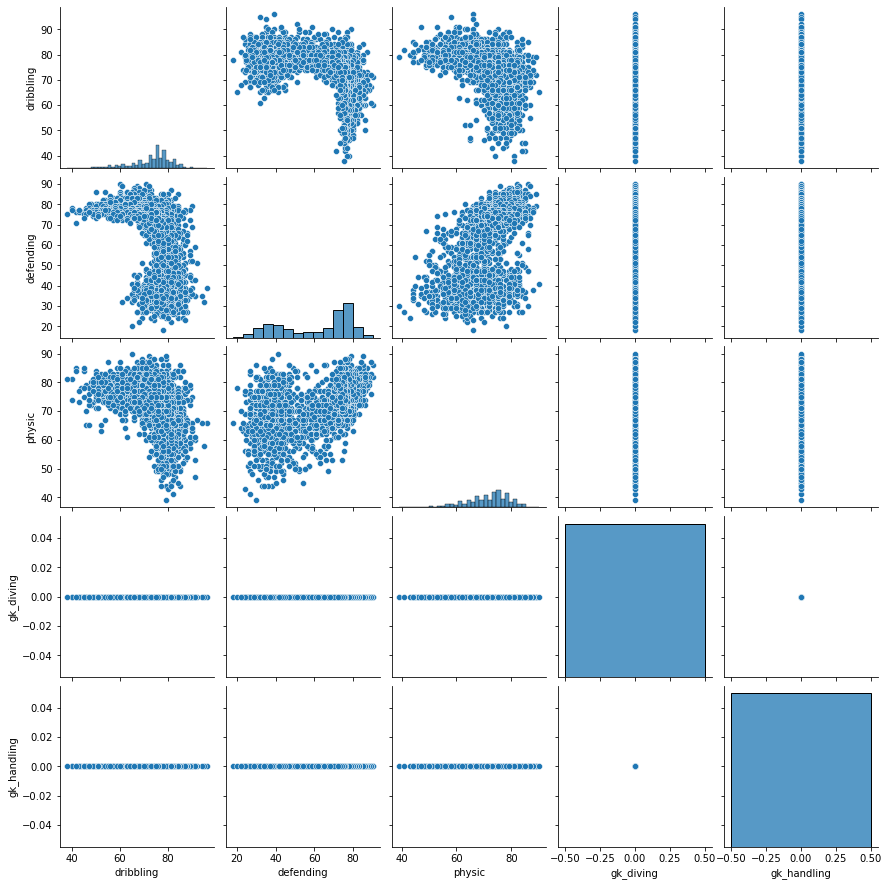

In [81]:
sea.pairplot(fifa_20_players.head(2000), vars = fifa_20_players.columns[29:34])
#sea.pairplot(fifa_20_players.head(1000))
plt.show()